<p>En este ejercicio simulamos un sistema f&iacute;sico muy simple, pero de gran inter&eacute;s. Supongamos una lista $L$ de longitud $n$ que en el momento inicial tiene en todas sus entradas el valor $5$. Cada una de esas entradas representa una "part&iacute;cula" que en el momento inicial $t=0$ tiene una "energ&iacute;a" igual a $5$ unidades. El sistema $L$ evoluciona en el tiempo, es decir para $t=0,1,2,3,\dots$&nbsp; obtenemos listas $L_0=L,L_1,L_2,L_3,\dots$, de la siguiente manera:</p>
<ol>
<li>Dada la lista $L_t$ elegimos una entrada al azar, es decir con igual probabilidad para cada una de las $n$ entradas. Supongamos que hemos obtenido la entrada $i$.</li>
<li>A continuaci&oacute;n elegimos al azar otra entrada de $L_t$ y obtenemos la entrada $j$.</li>
<li>Si $L_t[i]$ es mayor que cero, definimos&nbsp; $L_{t+1}[i]:=L_t[i]-1$ y $L_{t+1}[j]:= L_t[j]+1$, y dejamos las dem&aacute;s entradas igual, y si $L_t[i]=0$ dejamos $L_{t+1}=L_{t}$. &nbsp; Es decir, la part&iacute;cula $i$ ha "interaccionado", en el instante $t$, con la $j$ y le ha transferido una unidad de energ&iacute;a, pero todo el tiempo&nbsp; la energ&iacute;a total del sistema es&nbsp; $5n$ y, por tanto,&nbsp; la energ&iacute;a media es siempre $5$.</li>
</ol>
<p>EJERCICIO A RESOLVER:</p>
<ol>
<li>Programa una funci&oacute;n de dos argumentos enteros $n$ la longitud de $L$ y $N$ el valor m&aacute;ximo de $t$,&nbsp; y que devuelva la lista $L_N$, que representa los valores de la energ&iacute;a de las part&iacute;culas despu&eacute;s del paso de $N$ "segundos".</li>
<li>Define una lista, por ejemplo $M=[1,2,3]$, define <strong>T=M.finance.TimeSeries( ), </strong>que convierte la lista en una serie temporal (el primer elemento es el correspondiente s $t=0$, el segundo a $t=1$, etc.)&nbsp; y estudia<strong> &nbsp; </strong>la informaci&oacute;n<strong> (</strong>poca<strong>) </strong>que se obtiene con la instrucci&oacute;n&nbsp;<strong> T.plot_histogram? . </strong>El gr&aacute;fico que se obtiene es el "histograma" correspondiente a la serie temporal $T$.&nbsp; <strong><br /></strong></li>
<li>Utiliza la informaci&oacute;n obtenida en el punto 2<strong> </strong>para producir, mediante un bucle <strong>for</strong> adecuado,&nbsp; una serie de histogramas&nbsp; correspondientes a $n=1000$ y $N=100,1000,10000,100000,1000000$. &iquest;Qu&eacute; observas en los histogramas acerca de la evoluci&oacute;n temporal del sistema de part&iacute;culas? <strong><br /></strong></li>
</ol>

In [1]:
def interaccion(n,N):
    L = [5]*n
    for int in xrange(N):
        x = randint(0,n-1)
        y = randint(0,n-1)
        if L[x]>0:
            L[x] += -1
            L[y] += 1
    return L

In [2]:
LR = interaccion(1000,1000)

In [3]:
sum(LR)

5000

In [4]:
max(LR)

9

In [5]:
v=finance.TimeSeries(LR)

/usr/lib/sagemath/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


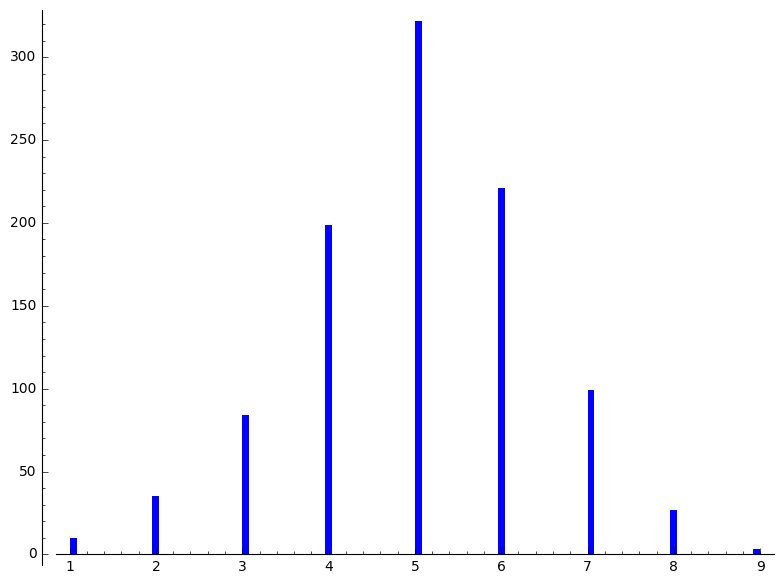

In [6]:
v.plot_histogram(bins=100,normalize=False)

In [7]:
LR1 = interaccion(1000,100000)

In [8]:
v1=finance.TimeSeries(LR1)

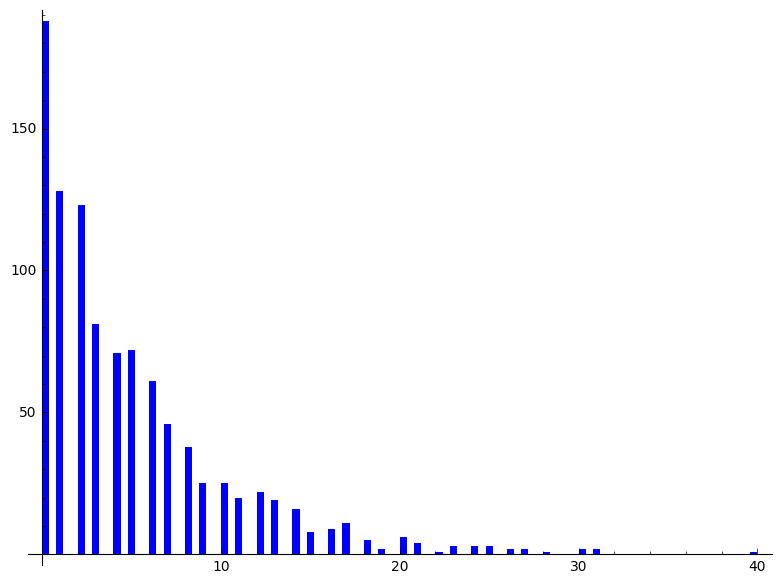

In [9]:
v1.plot_histogram(bins=100,normalize=False)

In [10]:
v1.plot_histogram?

In [11]:
[finance.TimeSeries(interaccion(1000,10^n)).plot_histogram(bins=100,normalize=False) for n in srange(1,7)]

[Graphics object consisting of 100 graphics primitives,
 Graphics object consisting of 100 graphics primitives,
 Graphics object consisting of 100 graphics primitives,
 Graphics object consisting of 100 graphics primitives,
 Graphics object consisting of 100 graphics primitives,
 Graphics object consisting of 100 graphics primitives]

<p><span style="font-size: medium;">Cambiamos un poco el modelo: ahora las part&iacute;tulas empiezan con una <strong>energ&iacute;a</strong>&nbsp;aleatoria y cuando interaccionan la part&iacute;cula que tiene m&aacute;s energ&iacute;a cede una unidad a la que tiene menos.&nbsp;</span></p>

In [12]:
[randint(0,3) for int in range(10)]

[1, 0, 0, 0, 3, 3, 1, 2, 0, 3]

In [13]:
def interaccion2(n,E,N):
    L = [randint(1,E) for muda in srange(n)]
    for int in xsrange(N):
        x = randint(0,n-1)
        y = randint(0,n-1)
        if L[x]>L[y]:
            L[x] += -1
            L[y] += 1
        elif L[y]>L[x]:
            L[y] += -1
            L[x] += 1
    return L

In [14]:
interaccion2(10,15,10^5)

[9, 9, 9, 9, 10, 9, 9, 9, 10, 10]

In [15]:
interaccion2(10,15,10^6)

[9, 9, 10, 9, 9, 9, 9, 10, 9, 10]